<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Appendix





The file contains additional models that were built for Project 2 but were not performing very satisfactorily and, thus, excluded from the main Project 2 report.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Importing the datasets

In [3]:
df_train = pd.read_csv('./datasets/train.csv')
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df_test = pd.read_csv('./datasets/test.csv')
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


## EDA

### Dataframe Shapes and summary

In [5]:
df_train.shape

(2051, 81)

In [6]:
df_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [7]:
df_train.loc[df_train['Garage Yr Blt'] > 2011, 'Garage Yr Blt'] = df_train['Year Built']

In [8]:
df_test.shape

(879, 80)

In [9]:
df_test.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,879.000000,8.790000e+02,879.000000,719.000000,879.000000,879.000000,879.000000,879.000000,879.000000,878.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,834.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,1445.588168,7.165050e+08,58.270762,69.630042,10340.920364,6.054608,5.565415,1970.533561,1984.444824,106.982916,443.397042,53.835040,539.518771,1036.750853,1148.053470,349.751991,2.725825,1500.531286,0.440273,0.055745,1.541524,0.399317,2.879408,1.047782,6.459613,0.618885,1976.796163,1.744027,470.832765,93.560865,47.478953,24.037543,2.594994,14.813424,1.882821,48.443686,6.207053,2007.824801
std,850.717105,1.889135e+08,42.211389,23.625372,10047.335167,1.374756,1.128422,30.403527,20.454546,188.356829,442.480223,178.539854,426.082726,419.258428,381.022337,434.595133,32.554124,517.413260,0.529983,0.229560,0.560908,0.506045,0.830249,0.223844,1.603071,0.669313,25.695683,0.751162,213.070155,121.174306,69.209179,73.212237,24.948416,52.975963,29.899698,549.858353,2.644097,1.327396
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.500000,5.284861e+08,20.000000,59.000000,7298.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,790.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1435.000000,5.354542e+08,50.000000,68.000000,9453.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,374.000000,0.000000,453.000000,975.000000,1064.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.000000,9.071921e+08,70.000000,80.000000,11606.500000,7.000000,6.000000,2000.000000,2003.000000,173.500000,735.500000,0.000000,781.500000,1248.000000,1358.000000,720.000000,0.000000,1781.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,3138.000000,3138.000000,2065.000000,481.000000,4676.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


### Checking datatypes

In [10]:
df_train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [11]:
for i,i2,col,col2 in zip(df_train[[x for x in df_train.columns if x != 'SalePrice']].dtypes,df_test.dtypes,df_train.columns,df_test.columns):
    if i != i2:
        print(i,i2,col,col2)

float64 int64 BsmtFin SF 1 BsmtFin SF 1
float64 int64 BsmtFin SF 2 BsmtFin SF 2
float64 int64 Bsmt Unf SF Bsmt Unf SF
float64 int64 Total Bsmt SF Total Bsmt SF
float64 int64 Bsmt Full Bath Bsmt Full Bath
float64 int64 Bsmt Half Bath Bsmt Half Bath
float64 int64 Garage Cars Garage Cars
float64 int64 Garage Area Garage Area


In [12]:
df_test[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath','Garage Cars','Garage Area']] = df_test[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath','Garage Cars','Garage Area']].astype('float64')

In [13]:
df_test[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath','Garage Cars','Garage Area']].dtypes

BsmtFin SF 1      float64
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Garage Cars       float64
Garage Area       float64
dtype: object

In [14]:
df_train['MS SubClass'] = df_train['MS SubClass'].astype('object')
df_train['MS SubClass'].dtypes

dtype('O')

In [15]:
df_test['MS SubClass'] = df_test['MS SubClass'].astype('object')
df_test['MS SubClass'].dtypes

dtype('O')

### Dealing with Missing Values

In [16]:
# Training set
#cols_null_majority = []
cols_with_na_train = []
for col,nulls in zip((df_train.isna().sum()).index,(df_train.isna().sum())):
    if nulls > 0:
#         print(col, nulls)
#         if nulls/2051 > 0.8:
#             cols_null_majority.append(col)
#         else:
        cols_with_na_train.append(col)

In [17]:
cols_with_na_train

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [18]:
#cols_null_majority

In [19]:
#df_train.drop(columns=cols_null_majority,inplace=True)
#df_test.drop(columns=cols_null_majority,inplace=True)

df_train.drop(columns=['Id','PID'],inplace=True)
df_test.drop(columns=['Id','PID'],inplace=True)

We are dropping columns PID and Id since these are irrelavant from the train and test datasets.

In [20]:
df_train.shape

(2051, 79)

In [21]:
df_test.shape

(879, 78)

In [22]:
# Testing set
cols_with_na_test = []
for col,nulls in zip((df_test.isna().sum()).index,(df_test.isna().sum())):
    if nulls > 0:
        print(col, nulls)
        cols_with_na_test.append(col)

Lot Frontage 160
Alley 821
Mas Vnr Type 1
Mas Vnr Area 1
Bsmt Qual 25
Bsmt Cond 25
Bsmt Exposure 25
BsmtFin Type 1 25
BsmtFin Type 2 25
Electrical 1
Fireplace Qu 422
Garage Type 44
Garage Yr Blt 45
Garage Finish 45
Garage Qual 45
Garage Cond 45
Pool QC 875
Fence 707
Misc Feature 838


In [23]:
#Function to impute missing values
def impute_missing(df, cols_with_na):
    df_copy = df.copy(deep=True)
    
    #Column specific imputations
#     df_copy.loc[df_copy['Garage Yr Blt'].isna(), 'Garage Yr Blt'] = df_copy['Year Built']
#     #General imputations
#     try:
#         cols_with_na.remove('Garage Yr Blt')
#     except ValueError:
#         print('Garage Yr Blt - not in the list')
        
    #numeric_cols_na = df_copy[cols_with_na].select_dtypes('number').columns
    #object_cols_na = df_copy[cols_with_na].select_dtypes('object').columns
#     for col in numeric_cols_na:
#         df_copy[col] = df_copy[col].fillna(0)
   #for col in object_cols_na:
     #   df_copy[col] = df_copy[col].fillna("None")
    
    

    # categorical columns
    df_copy.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)
   
    
    # numeric columns
    df_copy.fillna(df.select_dtypes(include='number').mean().iloc[0], inplace=True)
    
    

    return df_copy

In [24]:
#Function to impute missing values
def impute_missing2(df, cols_with_na):
    df_copy = df.copy(deep=True)
    
    #Column specific imputations
    df_copy.loc[df_copy['Garage Yr Blt'].isna(), 'Garage Yr Blt'] = df_copy['Year Built']
    #General imputations
    try:
        cols_with_na.remove('Garage Yr Blt')
    except ValueError:
        print('Garage Yr Blt - not in the list')
        
    numeric_cols_na = df_copy[cols_with_na].select_dtypes('number').columns
    object_cols_na = df_copy[cols_with_na].select_dtypes('object').columns
    for col in numeric_cols_na:
        df_copy[col] = df_copy[col].fillna(0)
    for col in object_cols_na:
        df_copy[col] = df_copy[col].fillna("None")
    

    
    

    return df_copy

In [25]:
df_train = impute_missing(df_train, cols_with_na_train)
df_test = impute_missing(df_test, cols_with_na_test)

In [26]:
df_train['Bsmt Qual'].unique()

array(['TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [27]:
print('Number of NA (train)',df_train.isna().sum().sum())
print('Number of NA (test)',df_test.isna().sum().sum())

Number of NA (train) 0
Number of NA (test) 0


Interpretation: In the missing columns, the missing values have been replaced with 0 for numeric and 'None' for categorical values. This makes sense as these missing values are not random as they have been left blank because the house does not contain the particular features. For examples houses without basements will have many of their basement related columns filled with NA. These have been dealth with appropriately.

### Fixing categories in categorical columns

In [28]:
# Checking the categories in categorical columns
counter = 0
for col in df_train.columns:
    if df_train[col].dtype != 'object':
        continue
    counter += 1
    print(col)
    print(list(df_train[col].unique()))
    print('\n')
print("Total Object columns: ",counter)

MS Zoning
['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)']


Street
['Pave', 'Grvl']


Alley
['Grvl', 'Pave']


Lot Shape
['IR1', 'Reg', 'IR2', 'IR3']


Land Contour
['Lvl', 'HLS', 'Bnk', 'Low']


Utilities
['AllPub', 'NoSeWa', 'NoSewr']


Lot Config
['CulDSac', 'Inside', 'Corner', 'FR2', 'FR3']


Land Slope
['Gtl', 'Sev', 'Mod']


Neighborhood
['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown', 'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt', 'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV', 'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill', 'Blueste', 'GrnHill', 'Greens', 'Landmrk']


Condition 1
['RRAe', 'Norm', 'PosA', 'Artery', 'Feedr', 'PosN', 'RRAn', 'RRNe', 'RRNn']


Condition 2
['Norm', 'RRNn', 'Feedr', 'Artery', 'PosA', 'PosN', 'RRAe', 'RRAn']


Bldg Type
['1Fam', 'TwnhsE', 'Twnhs', '2fmCon', 'Duplex']


House Style
['2Story', '1Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin', '1.5Unf']


Roof Style
['Gable

In [29]:
counter = 0
for col in df_test.columns:
    if df_test[col].dtype != 'object':
        continue
    counter += 1
    print(col)
    print(list(df_test[col].unique()))
    print('\n')
print("Total Object columns: ",counter)

MS Zoning
['RM', 'RL', 'FV', 'RH', 'C (all)', 'I (all)']


Street
['Pave', 'Grvl']


Alley
['Grvl', 'Pave']


Lot Shape
['Reg', 'IR1', 'IR3', 'IR2']


Land Contour
['Lvl', 'Bnk', 'Low', 'HLS']


Utilities
['AllPub', 'NoSewr']


Lot Config
['Inside', 'CulDSac', 'Corner', 'FR2', 'FR3']


Land Slope
['Gtl', 'Mod', 'Sev']


Neighborhood
['OldTown', 'Sawyer', 'Gilbert', 'NAmes', 'MeadowV', 'CollgCr', 'Somerst', 'Mitchel', 'SawyerW', 'IDOTRR', 'BrkSide', 'Edwards', 'ClearCr', 'NWAmes', 'Timber', 'NoRidge', 'NridgHt', 'Crawfor', 'StoneBr', 'Veenker', 'BrDale', 'SWISU', 'Blmngtn', 'NPkVill', 'Greens', 'Blueste']


Condition 1
['Norm', 'Feedr', 'Artery', 'PosA', 'RRAn', 'PosN', 'RRNn', 'RRAe', 'RRNe']


Condition 2
['Norm', 'PosN', 'Feedr', 'PosA']


Bldg Type
['2fmCon', 'Duplex', '1Fam', 'TwnhsE', 'Twnhs']


House Style
['2Story', '1Story', '1.5Fin', 'SLvl', 'SFoyer', '2.5Fin', '2.5Unf', '1.5Unf']


Roof Style
['Gable', 'Hip', 'Gambrel', 'Flat', 'Mansard', 'Shed']


Roof Matl
['CompShg', 'Meta

In [30]:
def fixing_categories(df):    
    df['MS Zoning'] = df['MS Zoning'].replace({'C (all)':'C','A (agr)':'A','I (all)':'I'})
    df['Neighborhood'] = df['Neighborhood'].replace({'NAmes':'Names'})
    df['Bldg Type'] = df['Bldg Type'].replace({'2fmCon':'2FmCon','Duplex':'Duplx','Twnhs':'TwnhsI'})
    df['Neighborhood'] = df['Neighborhood'].replace({'NAmes':'Names'})
    df['Exterior 2nd'] = df['Exterior 2nd'].replace({'Brk Cmn':'BrkComm'})
    return df

In [31]:
df_train = fixing_categories(df_train)
df_test = fixing_categories(df_test)

Interpretation: Fixing the categorical values align with the ones in the data dictionary.

### Feature Engineering

#### Converting Yr columns to age

In [32]:
def convert_yrs_cols(df):
    yr_cols = ['Year Built','Year Remod/Add','Garage Yr Blt','Yr Sold']
    df_copy = df.copy(deep=True)
    for col in yr_cols:
        df_copy[col] = 2011 - df_copy[col]
    return df_copy

In [33]:
df_train = convert_yrs_cols(df_train)
df_test = convert_yrs_cols(df_test)

In [34]:
df_train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,69.0552,13517,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,35,6,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Gd,Attchd,35.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,Gd,MnPrv,Shed,0,3,1,WD,130500
1,60,RL,43.0000,11492,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,15,14,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,14.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,Gd,MnPrv,Shed,0,4,2,WD,220000
2,20,RL,68.0000,7922,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Names,Norm,Norm,1Fam,1Story,5,7,58,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Gd,Detchd,58.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,Gd,MnPrv,Shed,0,1,1,WD,109000
3,60,RL,73.0000,9802,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,5,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,Gd,BuiltIn,4.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,Gd,MnPrv,Shed,0,4,1,WD,174000
4,50,RL,82.0000,14235,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,111,18,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Gd,Detchd,54.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,Gd,MnPrv,Shed,0,3,1,WD,138500


Interpretation: Converting the actualy years to Age instead for Years related columns.

#### Encoding categorical columns (Ordinal + OHE)

In [35]:
# Function to do OrdinalEncoding for categorical features
def encode_ordinal(df):
    #Perform Ordinal Encoding
    lot_shape_order = ['None','IR3','IR2','IR1','Reg'] # 'Lot Shape'
    utils_order = ['None','ELO','NoSeWa','NoSewr','AllPub'] # 'Utilities'
    land_slope_order = ['None','Sev','Mod','Gtl'] # 'Land Slope'
    qual_order = ['None','Po','Fa','TA','Gd','Ex']  # 'Exter Qual', 'Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Pool QC'
    exposure_order = ['None','No','Mn','Av','Gd'] #'Bsmt Exposure'
    basement_type_order = ['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'] # 'BsmtFin Type 1','BsmtFin Type 2'
    elect_order = ['None','Mix','FuseP','FuseF','FuseA','SBrkr'] # 'Electrical'
    functional_order = ['None','Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'] #'Functional'
    garage_order = ['None','Unf','RFn','Fin'] #'Garage Finish'
    paved_order = ['None','N','P','Y'] # 'Paved Drive'
    fence_order = ['None','MnWw','GdWo','MnPrv','GdPrv'] # 'Fence'
    
    ordinal_columns = ['Lot Shape','Utilities','Land Slope','Exter Qual', 'Exter Cond','Bsmt Qual','Bsmt Cond',
                       'Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Pool QC','Bsmt Exposure',
                      'BsmtFin Type 1','BsmtFin Type 2','Electrical','Functional','Garage Finish','Paved Drive','Fence']
    df_copy = df.copy(deep=True)
    for col in ordinal_columns:
        
        if col == 'Lot Shape':
            order = lot_shape_order
        elif col == 'Utilities':
            order = utils_order
        elif col == 'Land Slope':
            order = land_slope_order
        elif col == 'Bsmt Exposure':
            order = exposure_order
        elif col in ['BsmtFin Type 1','BsmtFin Type 2']:
            order = basement_type_order
        elif col == 'Electrical':
            order = elect_order
        elif col == 'Functional':
            order = functional_order
        elif col == 'Garage Finish':
            order = garage_order
        elif col == 'Paved Drive':
            order = paved_order
        elif col == 'Fence':
            order = fence_order  
        else:
            order = qual_order
        enc = OrdinalEncoder(categories=[order])
        x = df[[col]]
        print(col)
        enc.fit(x)
        df_copy[col] = enc.transform(x)
    
    return df_copy

In [36]:
# df_train = encode_ordinal(df_train)
# df_train.head()

In [37]:
# df_test = encode_ordinal(df_test)
# df_test.head()

In [38]:
# This function trains using the second parameter 'training_df' and transform 'df' accordingly.
def encode_categories(df,training_df):
    """    
    df is the dataframe to be operated on, training_df is the dataframe for fitting the OneHotEncoder
    """
    df_copy = df.copy(deep=True)
    cols = list(training_df.select_dtypes('object').columns) + ['Mo Sold']
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(training_df.select_dtypes('object'))
    encoded = enc.transform(df_copy.select_dtypes('object')).toarray()
    enc_df = pd.DataFrame(encoded,columns=enc.get_feature_names(training_df.select_dtypes('object').columns))

    enc.fit(training_df[['Mo Sold']])
    encoded_mo = enc.transform(df_copy[['Mo Sold']]).toarray()
    enc_mo_df = pd.DataFrame(encoded_mo,columns=enc.get_feature_names(['Mo Sold']))
    df_copy = (df_copy.join(enc_df))
    df_copy = (df_copy.join(enc_mo_df))

    cols2 = []
    # Since handle_unknown does not work with drop='first' in the OHE, we are manually dropping,
    # the first columns for each encoding.
    for col in cols:
        additional_col = col + "_" + str(np.sort(training_df[col].unique())[0])
        cols2.append(additional_col)
    cols = cols + cols2
    df_copy.drop(cols,inplace=True,axis=1)
    return df_copy
    

In [39]:
# This function trains using the second parameter 'training_df' and transform 'df' accordingly.
def encode_categories2(df,training_df):
    """    
    df is the dataframe to be operated on, training_df is the dataframe for fitting the OneHotEncoder
    """
    df_copy = df.copy(deep=True)
    cols = list(training_df.select_dtypes('object').columns) + ['Mo Sold','Overall Qual','Overall Cond','MS SubClass']
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(training_df.select_dtypes('object'))
    encoded = enc.transform(df_copy.select_dtypes('object')).toarray()
    enc_df = pd.DataFrame(encoded,columns=enc.get_feature_names(df_train.select_dtypes('object').columns))

    enc.fit(training_df[['Mo Sold','Overall Qual','Overall Cond','MS SubClass']])
    encoded_mo = enc.transform(df_copy[['Mo Sold','Overall Qual','Overall Cond','MS SubClass']]).toarray()
    enc_mo_df = pd.DataFrame(encoded_mo,columns=enc.get_feature_names(['Mo Sold','Overall Qual','Overall Cond','MS SubClass']))
    df_copy = (df_copy.join(enc_df))
    df_copy = (df_copy.join(enc_mo_df))

    cols2 = []
    # Since handle_unknown does not work with drop='first' in the OHE, we are manually dropping,
    # the first columns for each encoding.
    for col in cols:
        additional_col = col + "_" + str(np.sort(training_df[col].unique())[0])
        cols2.append(additional_col)
    cols = cols + cols2
    df_copy.drop(cols,inplace=True,axis=1)
    return df_copy
    

In [40]:
df_train.dtypes

MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
BsmtFin SF 2       float64
Bsmt Unf SF        float64
T

In [41]:
df_train_encoded = encode_categories(df_train,df_train)
df_train_encoded.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale 

In [42]:
df_test_encoded = encode_categories(df_test,df_train)
df_test_encoded.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI

In [43]:
df_train.select_dtypes('object')

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
0,RL,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD
1,RL,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD
2,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Names,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD
3,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Gd,BuiltIn,Fin,TA,TA,Y,Gd,MnPrv,Shed,WD
4,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,N,Gd,MnPrv,Shed,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,Gd,MnPrv,Shed,WD
2047,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD
2048,RL,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Stone,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Detchd,Unf,Fa,Fa,Y,Gd,MnPrv,Shed,WD
2049,RL,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,Names,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD


Interpretation: The two functions above does Ordinal and OneHotEncoding respectively. Columns that has order are encoded with Ordinal Encoder while the remaining Categorical columns are encoded using OneHotEncoding.

#### Adding interaction terms

In [44]:
df_train_encoded[['Year Built','Year Remod/Add']].describe()

,Year Built,Year Remod/Add
count,2051.000000,2051.000000
mean,39.291078,26.809849
std,30.177889,21.036250
min,1.000000,1.000000
25%,10.000000,7.000000
50%,37.000000,18.000000
75%,57.500000,46.500000
max,139.000000,61.000000


In [45]:
df_train_encoded['Yr_Blt_Remod'] = df_train_encoded['Year Built']*df_train_encoded['Year Remod/Add']
df_test_encoded['Yr_Blt_Remod'] = df_test_encoded['Year Built']*df_test_encoded['Year Remod/Add']

In [46]:
df_train_encoded.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale 

Interpretation: Adding an interaction term 'Yr_Blt_Remod' that combines 'Year Built' and 'Year Remod/Add' as this might give some relationship between house age and refit and their corresponding sale prices.

#### Correlation

In [47]:
corr_matrix = df_train_encoded.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
highly_correlated_cols = [column for column in upper.columns if any(upper[column] > 0.8)]
try:
    highly_correlated_cols.remove('SalePrice')
except: 
    print('SalePrice not in the list')
highly_correlated_cols

['1st Flr SF',
 'Bsmt Half Bath',
 'TotRms AbvGrd',
 'MS Zoning_RM',
 'Utilities_NoSewr',
 'Neighborhood_Somerst',
 'House Style_2Story',
 'Roof Style_Hip',
 'Exterior 2nd_BrkComm',
 'Exterior 2nd_CmentBd',
 'Exterior 2nd_HdBoard',
 'Exterior 2nd_MetalSd',
 'Exterior 2nd_VinylSd',
 'Exterior 2nd_Wd Sdng',
 'Mas Vnr Type_None',
 'Exter Qual_TA',
 'Exter Cond_TA',
 'Kitchen Qual_TA',
 'Fireplace Qu_TA',
 'Garage Type_Detchd',
 'Garage Qual_TA',
 'Garage Cond_TA',
 'Yr_Blt_Remod']

In [48]:
df_train_encoded.drop(columns=highly_correlated_cols,inplace=True)
df_test_encoded.drop(columns=highly_correlated_cols,inplace=True)

In [49]:
df_train_encoded.shape

(2051, 236)

In [50]:
df_test_encoded.shape

(879, 235)

Interpretation: We are removing columns which are very highly correlated with each other - multicollinear.

#### Standardising the values

In [51]:
# Function to standardise df using training_df to train StandardScaler object
def standardise(df,training_df):
    df_copy = df.copy(deep=True)
    X_cols = list(training_df.columns[~training_df.columns.isin(['SalePrice','Id','PID'])])
    X = training_df[X_cols]
    X_df_copy = df[X_cols]
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X_df_copy)
    return pd.DataFrame(X_scaled,columns=X_cols)

In [52]:
df_train_standardised = standardise(df_train_encoded,df_train_encoded)
df_train_standardised.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_ImStucc,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12
0,0.069866,0.000000,0.512071,-0.078644,2.207728,-0.142227,-0.989479,1.089794,0.197117,-0.290862,-0.844026,-0.739359,0.997894,-0.107977,-0.040634,-0.224264,0.769779,1.255611,0.189383,-0.204568,-0.925701,-0.23

In [53]:
df_test_standardised = standardise(df_test_encoded,df_train_encoded)
df_test_standardised.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_ImStucc,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12
0,3.106271,-0.002591,-0.136957,-0.078644,2.207728,2.045338,1.625693,-0.571050,-0.958932,-0.290862,1.017175,-0.083397,1.622942,-0.107977,0.856782,-0.224264,0.769779,-0.740713,1.399426,4.563266,-0.925701,-0.08

In [54]:
df_test_standardised.shape

(879, 235)

## Visualisation

<AxesSubplot:>

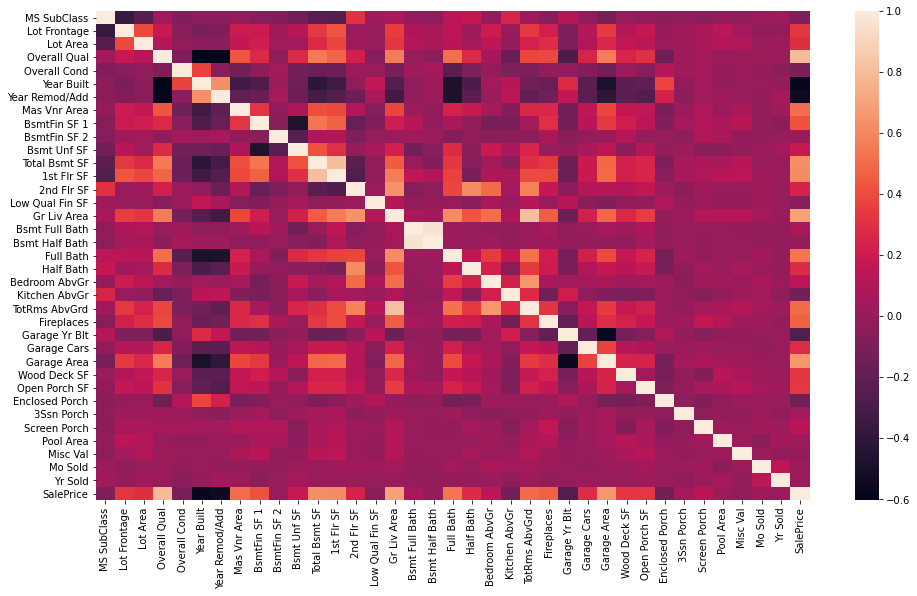

In [55]:
plt.figure(figsize=(16,9))
sns.heatmap(df_train.corr())

Text(0.5, 1.0, 'Zoning Types and Sale Price')

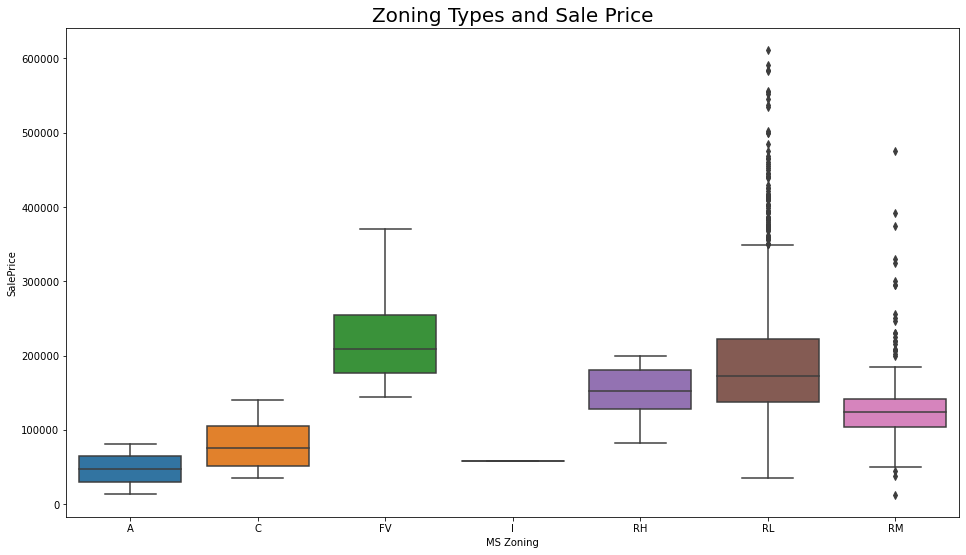

In [56]:
plt.figure(figsize=(16,9))
sns.boxplot(data=df_train,x='MS Zoning',y='SalePrice',order=sorted(list(df_train['MS Zoning'].unique())))
plt.title("Zoning Types and Sale Price",size = 20)

Text(0.5, 1.0, 'Zoning Types and Sale Price')

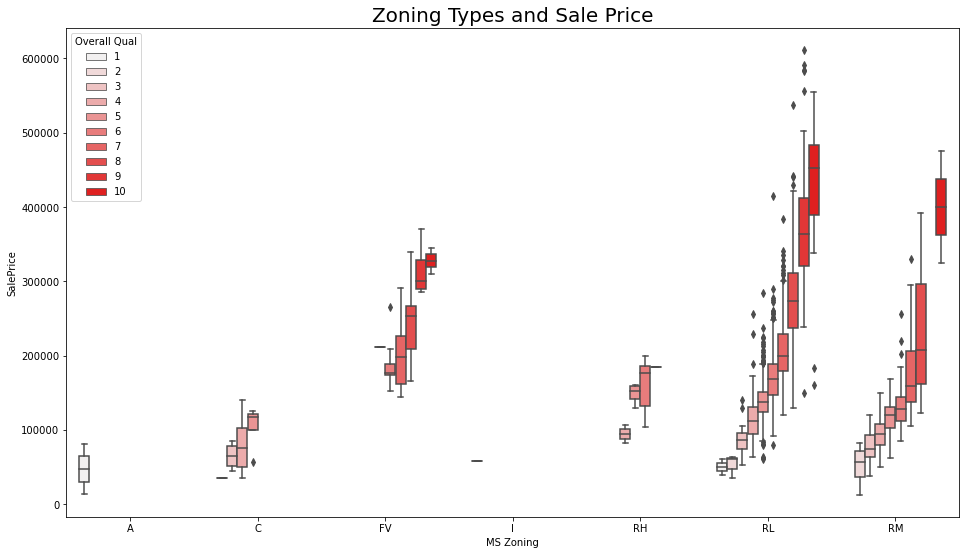

In [57]:
plt.figure(figsize=(16,9))
sns.boxplot(data=df_train,x='MS Zoning',y='SalePrice',hue='Overall Qual',color='red',order=sorted(list(df_train['MS Zoning'].unique())))
plt.title("Zoning Types and Sale Price",size = 20)

Text(0, 0.5, 'Sale Price')

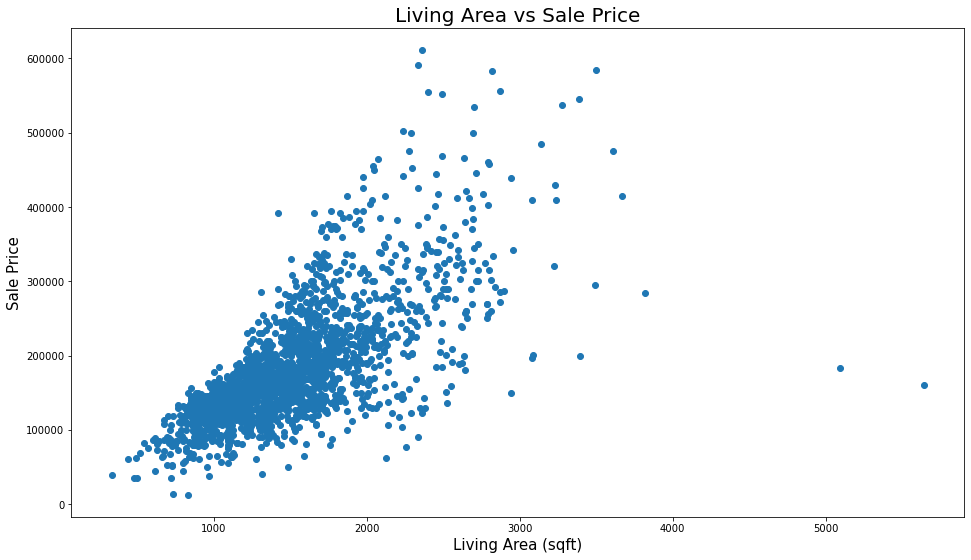

In [58]:
plt.figure(figsize=(16,9))
plt.scatter(df_train['Gr Liv Area'],df_train['SalePrice'])
plt.title("Living Area vs Sale Price",size = 20)
plt.xlabel("Living Area (sqft)", size = 15)
plt.ylabel("Sale Price", size = 15)

## Predictive Models

In [59]:
X = df_train_standardised[[col for col in df_train_standardised.columns if col != 'SalePrice']]
y = df_train_encoded['SalePrice']

In [60]:
X

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_ImStucc,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12
0,0.069866,0.000000,0.512071,-0.078644,2.207728,-0.142227,-0.989479,1.089794,0.197117,-0.290862,-0.844026,-0.739359,0.997894,-0.107977,-0.040634,-0.224264,0.769779,1.255611,0.189383,-0.204568,-0.925701,-0.23

In [61]:
y

0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: SalePrice, Length: 2051, dtype: int64

In [62]:
X.shape

(2051, 235)

In [63]:
y.shape

(2051,)

In [64]:
X_test = df_test_standardised
X_test.shape

(879, 235)

In [65]:
X_test.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_ImStucc,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12
0,3.106271,-0.002591,-0.136957,-0.078644,2.207728,2.045338,1.625693,-0.571050,-0.958932,-0.290862,1.017175,-0.083397,1.622942,-0.107977,0.856782,-0.224264,0.769779,-0.740713,1.399426,4.563266,-0.925701,-0.08

### ElasticNet

Finding the best alpha and l1_ratio values:

In [67]:
np.arange(0.1,1.1,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [69]:
elasticnetcv = ElasticNetCV(n_alphas=100, l1_ratio=np.arange(0.1,1.1,0.1),cv = 5)
elasticnetcv.fit(X,y)

ElasticNetCV(cv=5,
             l1_ratio=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [70]:
opt_alpha = elasticnetcv.alpha_
opt_alpha

781.721738191872

In [71]:
opt_l1_ratio = elasticnetcv.l1_ratio_
opt_l1_ratio

1.0

In [72]:
elasticnetcv.score(X,y)

0.8985635173251351

In [73]:
elasticnet = ElasticNet(alpha = opt_alpha, l1_ratio=opt_l1_ratio)
elasticnet.fit(X,y)

ElasticNet(alpha=781.721738191872, l1_ratio=1.0)

In [74]:
cross_val_score(elasticnet,X,y,cv = 5).mean()

0.857190642082104

In [75]:
metrics.mean_squared_error(y,elasticnet.predict(X),squared=False)

25237.01077668268

In [76]:
np.abs(cross_val_score(elasticnet,X,y,cv = 5,scoring='neg_root_mean_squared_error')).mean()

29669.60511033465

In [77]:
y_test_pred = elasticnet.predict(X_test)
predictions = pd.DataFrame(y_test_pred,columns = ['SalePrice'])
predictions['Id'] = pd.read_csv('./datasets/test.csv')['Id']
predictions = predictions[['Id','SalePrice']]
predictions.sort_values(by='Id',inplace=True)
predictions.to_csv('./datasets/elasticnet.csv',index=False)

#### Extracting the top 30 features from the first ElasticNet model

In [78]:
big_coef = [x for x in list(zip(elasticnet.coef_,X.columns)) if np.abs(x[0]) > 0]
big_coef.sort(key=lambda x: np.abs(x[0]),reverse=True)

In [79]:
top_features = [ x[1] for x in big_coef[:30]]
top_features

['Gr Liv Area',
 'Overall Qual',
 'Neighborhood_NridgHt',
 'Year Built',
 'Misc Val',
 'Neighborhood_StoneBr',
 'MS SubClass',
 'Bsmt Qual_Gd',
 'Garage Area',
 'BsmtFin SF 1',
 'Bsmt Qual_TA',
 'Neighborhood_NoRidge',
 'Bsmt Exposure_Gd',
 'Year Remod/Add',
 'Sale Type_New',
 'Total Bsmt SF',
 'Overall Cond',
 'Screen Porch',
 'Fireplaces',
 'Mas Vnr Area',
 'Misc Feature_Gar2',
 'Lot Shape_IR3',
 'Bsmt Exposure_No',
 'Lot Area',
 'Neighborhood_GrnHill',
 'BsmtFin Type 1_GLQ',
 'Exterior 1st_BrkFace',
 'MS Zoning_FV',
 'Foundation_PConc',
 'Roof Matl_WdShngl']

In [80]:
X_top_features = X[top_features]
X_test_top_features = X_test[top_features]

elasticnetcv.fit(X_top_features,y)
elasticnetcv.score(X_top_features,y)

0.8837431659519802

In [81]:
X_top_features.shape

(2051, 30)

In [82]:
X_test_top_features.shape

(879, 30)

In [83]:
opt_alpha = elasticnetcv.alpha_
opt_alpha

157.06611151976233

In [84]:
opt_l1_ratio = elasticnetcv.l1_ratio_
opt_l1_ratio

1.0

In [85]:
elasticnet = ElasticNet(alpha = opt_alpha, l1_ratio=opt_l1_ratio)
elasticnet.fit(X_top_features,y)

ElasticNet(alpha=157.06611151976233, l1_ratio=1.0)

In [86]:
elasticnet.score(X_top_features,y)

0.8837431659519802

In [87]:
cross_val_score(elasticnet,X_top_features,y,cv=5).mean()

0.860058061059771

In [88]:
metrics.mean_squared_error(y,elasticnet.predict(X_top_features),squared=False)

27017.80534088389

In [89]:
np.abs(cross_val_score(elasticnet,X_top_features,y,cv = 5,scoring='neg_root_mean_squared_error')).mean()

29329.809216691552

In [90]:
y_test_pred = elasticnet.predict(X_test_top_features)
predictions = pd.DataFrame(y_test_pred,columns = ['SalePrice'])
predictions['Id'] = pd.read_csv('./datasets/test.csv')['Id']
predictions = predictions[['Id','SalePrice']]
predictions.sort_values(by='Id',inplace=True)
predictions.to_csv('./datasets/elasticnet_top_30_features.csv',index=False)

#### Features Highly Correlated to SalePrice

In [91]:
corr_with_y = list(zip(np.abs(df_train_encoded.corrwith(y)),df_train_encoded.corrwith(y).index))
corr_with_y = sorted(corr_with_y, key=lambda x: x[0], reverse=True)[1:]
top_20_correlated_features = [x[1] for x in corr_with_y[:20]]
top_20_correlated_features

['Overall Qual',
 'Gr Liv Area',
 'Garage Area',
 'Total Bsmt SF',
 'Year Built',
 'Year Remod/Add',
 'Full Bath',
 'Garage Finish_Unf',
 'Foundation_PConc',
 'Mas Vnr Area',
 'Bsmt Qual_TA',
 'Fireplaces',
 'Neighborhood_NridgHt',
 'Exter Qual_Gd',
 'BsmtFin SF 1',
 'BsmtFin Type 1_GLQ',
 'Bsmt Exposure_Gd',
 'Sale Type_New',
 'Foundation_CBlock',
 'Bsmt Exposure_No']

In [92]:
X_top_correlated_features = X[top_20_correlated_features]
X_test_top_correlated_features = X_test[top_20_correlated_features]

elasticnetcv.fit(X_top_correlated_features,y)
elasticnetcv.score(X_top_correlated_features,y)

0.8307868353265135

In [93]:
opt_alpha = elasticnetcv.alpha_
opt_alpha

679.9017021170207

In [94]:
opt_l1_ratio = elasticnetcv.l1_ratio_
opt_l1_ratio

1.0

In [95]:
elasticnet = ElasticNet(alpha = opt_alpha, l1_ratio=opt_l1_ratio)
elasticnet.fit(X_top_correlated_features,y)

ElasticNet(alpha=679.9017021170207, l1_ratio=1.0)

In [96]:
elasticnet.score(X_top_correlated_features,y)

0.8307868353265135

In [97]:
cross_val_score(elasticnet,X_top_correlated_features,y,cv=5).mean()

0.8230465637974131

In [98]:
metrics.mean_squared_error(y,elasticnet.predict(X_top_correlated_features),squared=False)

32595.518688322343

In [99]:
np.abs(cross_val_score(elasticnet,X_top_correlated_features,y,cv = 5,scoring='neg_root_mean_squared_error')).mean()

33110.91245942695

In [100]:
y_test_pred = elasticnet.predict(X_test_top_correlated_features)
predictions = pd.DataFrame(y_test_pred,columns = ['SalePrice'])
predictions['Id'] = pd.read_csv('./datasets/test.csv')['Id']
predictions = predictions[['Id','SalePrice']]
predictions.sort_values(by='Id',inplace=True)
predictions.to_csv('./datasets/elasticnet_top_20_corr_features.csv',index=False)

#### Removing outliers

In [101]:
df_train_encoded_no_outliers = df_train_encoded.copy(deep=True)

In [102]:
df_train_encoded_no_outliers.shape

(2051, 236)

In [103]:
df_train_encoded_no_outliers = df_train_encoded_no_outliers[(np.abs(stats.zscore(df_train_encoded_no_outliers['SalePrice'])) < 3)]
df_train_encoded_no_outliers.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_ImStucc,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12
0,60,69.0552,13517,6,8,35,6,289.0,533.0,0.0,192.0,725.0,754,0,1479,0.0,2,1,3,1,0,35.0,2.0,475.0,0,44,0,0,0,0,0,1,130500,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0

In [104]:
df_train_encoded_no_outliers.shape

(2018, 236)

In [105]:
df_train_encoded_no_outliers_standardised = standardise(df_train_encoded_no_outliers, df_train_encoded_no_outliers)
df_train_encoded_no_outliers_standardised.shape

(2018, 235)

In [106]:
df_train_encoded_no_outliers_standardised.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_ImStucc,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12
0,0.062552,0.014207,0.537938,-0.043949,2.193102,-0.158948,-1.006233,1.224665,0.231845,-0.2931,-0.842796,-0.734719,1.019740,-0.106609,-0.004569,-0.219762,0.798122,1.270408,0.192648,-0.206305,-0.913326,-0.2394

In [107]:
X_train_no_outliers_standardised = df_train_encoded_no_outliers_standardised
y = df_train_encoded_no_outliers['SalePrice']

In [108]:
X_test_no_outliers_standardised = standardise(df_test_encoded,df_train_encoded_no_outliers)

In [109]:
X_train_no_outliers_standardised.shape

(2018, 235)

In [110]:
y.shape

(2018,)

In [111]:
X_test_no_outliers_standardised.shape

(879, 235)

In [112]:
elasticnetcv.fit(X_train_no_outliers_standardised,y)
elasticnetcv.score(X_train_no_outliers_standardised,y)

0.8930803951613114

In [113]:
opt_alpha = elasticnetcv.alpha_
opt_alpha

779.3076612976698

In [114]:
opt_l1_ratio = elasticnetcv.l1_ratio_
opt_l1_ratio

1.0

In [115]:
elasticnet = ElasticNet(alpha = opt_alpha, l1_ratio=opt_l1_ratio)
elasticnet.fit(X_train_no_outliers_standardised,y)

ElasticNet(alpha=779.3076612976698, l1_ratio=1.0)

In [116]:
elasticnet.score(X_train_no_outliers_standardised,y)

0.8930803951613114

In [117]:
cross_val_score(elasticnet,X_train_no_outliers_standardised,y,cv=5).mean()

0.8472920797283467

In [118]:
metrics.mean_squared_error(y,elasticnet.predict(X_train_no_outliers_standardised),squared=False)

22531.049715576177

In [119]:
np.abs(cross_val_score(elasticnet,X_train_no_outliers_standardised,y,cv = 5,scoring='neg_root_mean_squared_error')).mean()

26407.930561807287

In [120]:
y_test_pred = elasticnet.predict(X_test_no_outliers_standardised)
predictions = pd.DataFrame(y_test_pred,columns = ['SalePrice'])
predictions['Id'] = pd.read_csv('./datasets/test.csv')['Id']
predictions = predictions[['Id','SalePrice']]
predictions.sort_values(by='Id',inplace=True)
predictions.to_csv('./datasets/elasticnet_no_outliers.csv',index=False)

In [121]:
big_coef = [x for x in list(zip(elasticnet.coef_,X_train_no_outliers_standardised.columns)) if np.abs(x[0]) > 0]
big_coef.sort(key=lambda x: np.abs(x[0]),reverse=True)

In [122]:
big_coef

[(20099.363742104742, 'Gr Liv Area'),
 (16772.102865393612, 'Overall Qual'),
 (8602.893966266516, 'Neighborhood_NridgHt'),
 (-8177.356524265913, 'Year Built'),
 (-5977.463621323818, 'Misc Val'),
 (-5811.037730522298, 'MS SubClass'),
 (5351.348273620012, 'Garage Area'),
 (4648.750546536879, 'Neighborhood_NoRidge'),
 (3924.6045522218014, 'Fireplaces'),
 (-3787.445714886264, 'Year Remod/Add'),
 (3776.319035271269, 'BsmtFin SF 1'),
 (-3530.298093921769, 'Bsmt Qual_Gd'),
 (3496.0868375996374, 'Overall Cond'),
 (3065.7197097594776, 'Bsmt Exposure_Gd'),
 (-2881.0851945210766, 'Bsmt Qual_TA'),
 (2873.674950772759, 'Total Bsmt SF'),
 (2801.1721781832184, 'Neighborhood_Crawfor'),
 (-2774.3264530590054, 'Lot Shape_IR3'),
 (2757.483639182117, 'Neighborhood_StoneBr'),
 (-2743.1458356192024, 'Bsmt Exposure_No'),
 (2580.6587989171294, 'MS Zoning_FV'),
 (2571.6044069468844, 'Misc Feature_Gar2'),
 (2568.1223414289693, 'Lot Area'),
 (2485.783886078903, 'Neighborhood_GrnHill'),
 (2343.22302287928, 'Exter

In [123]:
top_features = [ x[1] for x in big_coef[:30]]
top_features

['Gr Liv Area',
 'Overall Qual',
 'Neighborhood_NridgHt',
 'Year Built',
 'Misc Val',
 'MS SubClass',
 'Garage Area',
 'Neighborhood_NoRidge',
 'Fireplaces',
 'Year Remod/Add',
 'BsmtFin SF 1',
 'Bsmt Qual_Gd',
 'Overall Cond',
 'Bsmt Exposure_Gd',
 'Bsmt Qual_TA',
 'Total Bsmt SF',
 'Neighborhood_Crawfor',
 'Lot Shape_IR3',
 'Neighborhood_StoneBr',
 'Bsmt Exposure_No',
 'MS Zoning_FV',
 'Misc Feature_Gar2',
 'Lot Area',
 'Neighborhood_GrnHill',
 'Exterior 1st_BrkFace',
 'Sale Type_New',
 'Screen Porch',
 'BsmtFin Type 1_GLQ',
 'Wood Deck SF',
 'Land Contour_HLS']

In [124]:
X_train_no_outliers_standardised.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_ImStucc,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12
0,0.062552,0.014207,0.537938,-0.043949,2.193102,-0.158948,-1.006233,1.224665,0.231845,-0.2931,-0.842796,-0.734719,1.019740,-0.106609,-0.004569,-0.219762,0.798122,1.270408,0.192648,-0.206305,-0.913326,-0.2394

#### Using the top features from the previous elasticnet to build a net elasticnet with just the top features

In [125]:
X_train_no_outliers_standardised_top_features = X_train_no_outliers_standardised[top_features]
X_test_no_outliers_standardised = X_test_no_outliers_standardised[top_features]

In [126]:
X_train_no_outliers_standardised_top_features.shape

(2018, 30)

In [127]:
X_test_no_outliers_standardised.shape

(879, 30)

In [128]:
elasticnetcv.fit(X_train_no_outliers_standardised_top_features,y)
elasticnetcv.score(X_train_no_outliers_standardised_top_features,y)

0.8824284599080208

In [129]:
opt_alpha = elasticnetcv.alpha_
opt_alpha

136.18622704612463

In [130]:
opt_l1_ratio = elasticnetcv.l1_ratio_
opt_l1_ratio

1.0

In [131]:
elasticnet = ElasticNet(alpha = opt_alpha, l1_ratio=opt_l1_ratio)
elasticnet.fit(X_train_no_outliers_standardised_top_features,y)

ElasticNet(alpha=136.18622704612463, l1_ratio=1.0)

In [132]:
elasticnet.score(X_train_no_outliers_standardised_top_features,y)

0.8824284599080208

In [133]:
cross_val_score(elasticnet,X_train_no_outliers_standardised_top_features,y,cv=5).mean()

0.8529997581658307

In [134]:
metrics.mean_squared_error(y,elasticnet.predict(X_train_no_outliers_standardised_top_features),squared=False)

23626.74298113324

In [135]:
np.abs(cross_val_score(elasticnet,X_train_no_outliers_standardised_top_features,y,cv = 5,scoring='neg_root_mean_squared_error')).mean()

25781.963319840426

In [136]:
y_test_pred = elasticnet.predict(X_test_no_outliers_standardised)
predictions = pd.DataFrame(y_test_pred,columns = ['SalePrice'])
predictions['Id'] = pd.read_csv('./datasets/test.csv')['Id']
predictions = predictions[['Id','SalePrice']]
predictions.sort_values(by='Id',inplace=True)
predictions.to_csv('./datasets/elasticnet_no_outliers_top_features.csv',index=False)

### Feature Selection with Backward Elimination - best so far

In [137]:
X = df_train_standardised[[col for col in df_train_standardised.columns if col != 'SalePrice']]
y = df_train_encoded['SalePrice']

#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.01):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Fireplaces', 'Garage Yr Blt', 'Garage Area', 'Screen Porch', 'MS Zoning_FV', 'MS Zoning_RL', 'Land Contour_HLS', 'Land Slope_Sev', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_GrnHill', 'Neighborhood_Mitchel', 'Neighborhood_NWAmes', 'Neighborhood_Names', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition 1_Norm', 'Condition 1_PosA', 'Condition 1_PosN', 'Bldg Type_TwnhsE', 'Bldg Type_TwnhsI', 'Roof Style_Mansard', 'Roof Matl_CompShg', 'Roof Matl_Membran', 'Roof Matl_Tar&Grv', 'Roof Matl_WdShake', 'Roof Matl_WdShngl', 'Exterior 1st_BrkFace', 'Mas Vnr Type_BrkFace', 'Foundation_CBlock', 'Bsmt Qual_Fa', 'Bsmt Qual_Gd', 'Bsmt Qual_TA', 'Bsmt Exposure_Gd', 'Bsmt Exposure_Mn', 'Bsmt Exposure_No', 'BsmtFin Type 1_GLQ', 'BsmtF

In [138]:
len(selected_features_BE)

68

In [139]:
X.shape

(2051, 235)

In [140]:
X_test = (standardise(df_test_encoded,df_train_encoded))
X_test.shape

(879, 235)

In [141]:
elasticnetcv.fit(X[selected_features_BE],y)
elasticnetcv.score(X[selected_features_BE],y)

0.8977065717245973

In [142]:
opt_alpha = elasticnetcv.alpha_
opt_alpha

634.0786029459315

In [143]:
opt_l1_ratio = elasticnetcv.l1_ratio_
opt_l1_ratio

1.0

In [144]:
elasticnet = ElasticNet(alpha = opt_alpha, l1_ratio=opt_l1_ratio)
elasticnet.fit(X[selected_features_BE],y)

ElasticNet(alpha=634.0786029459315, l1_ratio=1.0)

In [145]:
elasticnet.score(X[selected_features_BE],y)

0.8977065717245973

In [146]:
cross_val_score(elasticnet,X[selected_features_BE],y,cv=5).mean()

0.8633392846577509

In [147]:
metrics.mean_squared_error(y,elasticnet.predict(X[selected_features_BE]),squared=False)

25343.388977518625

In [148]:
np.abs(cross_val_score(elasticnet,X[selected_features_BE],y,cv = 5,scoring='neg_root_mean_squared_error')).mean()

28985.718862668487

In [149]:
big_coef = [x for x in list(zip(elasticnet.coef_,selected_features_BE)) if np.abs(x[0]) > 0]
big_coef.sort(key=lambda x: np.abs(x[0]),reverse=True)
big_coef

[(23816.251849472905, 'Gr Liv Area'),
 (17878.74941954979, 'Overall Qual'),
 (12163.295995913812, 'Misc Feature_Shed'),
 (9637.318795778505, 'Neighborhood_NridgHt'),
 (-9099.640882705438, 'Year Built'),
 (8611.140903968088, 'Roof Matl_CompShg'),
 (-8240.663393340885, 'Bsmt Qual_Gd'),
 (7977.907414726628, 'BsmtFin SF 1'),
 (-7897.897450440456, 'Bsmt Qual_TA'),
 (7686.5180543829465, 'Misc Feature_Gar2'),
 (7313.801183031561, 'Misc Feature_Othr'),
 (6497.394139645933, 'Neighborhood_StoneBr'),
 (6011.768872017257, 'Garage Area'),
 (-5870.45282286774, 'MS SubClass'),
 (5590.400771148356, 'Roof Matl_WdShngl'),
 (5036.46973970457, 'Roof Matl_Tar&Grv'),
 (4589.404944095468, 'Neighborhood_NoRidge'),
 (4499.9426252464455, 'Bsmt Exposure_Gd'),
 (4293.653497153976, 'Sale Type_New'),
 (4175.582607624098, 'Overall Cond'),
 (-4096.343425623833, 'Year Remod/Add'),
 (3834.1711565822243, 'Fireplaces'),
 (3632.7799410125863, 'Mas Vnr Area'),
 (3582.355970161556, 'Screen Porch'),
 (2994.801073624854, 'Lot

In [150]:
top_five_big_coef = [col for _,col in big_coef[:5]]
top_five_big_coef

['Gr Liv Area',
 'Overall Qual',
 'Misc Feature_Shed',
 'Neighborhood_NridgHt',
 'Year Built']

In [151]:
y_test_pred = elasticnet.predict(X_test[selected_features_BE])
predictions = pd.DataFrame(y_test_pred,columns = ['SalePrice'])
predictions['Id'] = pd.read_csv('./datasets/test.csv')['Id']
predictions = predictions[['Id','SalePrice']]
predictions.sort_values(by='Id',inplace=True)
predictions.to_csv('./datasets/elastic_backwards_elimination.csv',index=False)

### Elastic with  extra interaction terms

In [152]:
top_five_big_coef

['Gr Liv Area',
 'Overall Qual',
 'Misc Feature_Shed',
 'Neighborhood_NridgHt',
 'Year Built']

Interpretation: Above is the five most important features (biggest coefficients) from the model above that uses Backwards Elimination to select features. Since only the top 2 features ('Gr Liv Area' and 'Overall Qual') are the only ones that does not include 0 in the column, we will only be using PolynomialFeatures on these two columns.

In [153]:
df_extra_interactions_train = df_train_encoded.copy(deep=True)

In [154]:
poly_df = df_extra_interactions_train[['Gr Liv Area','Overall Qual']]
poly = PolynomialFeatures(2,include_bias=False)
poly_df = pd.DataFrame(poly.fit_transform(poly_df),columns=poly.get_feature_names(poly_df.columns))
poly_df = poly_df.iloc[:,2:]
poly_df.head()

,Gr Liv Area^2,Gr Liv Area Overall Qual,Overall Qual^2
0,2187441.0,8874.0,36.0
1,4502884.0,14854.0,49.0
2,1117249.0,5285.0,25.0
3,2085136.0,7220.0,25.0
4,2088025.0,8670.0,36.0


In [155]:
df_extra_interactions_train.shape

(2051, 236)

In [156]:
df_extra_interactions_train = df_extra_interactions_train.join(poly_df)
df_extra_interactions_train

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_ImStucc,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,Gr Liv Area^2,Gr Liv Area Overall Qual,Overall Qual^2
0,60,69.0552,13517,6,8,35,6,289.0,533.0,0.0,192.0,725.0,754,0,1479,0.0,2,1,3,1,0,35.0,2.0,475.0,0,44,0,0,0,0,0,1,130500,0.0,0.0,0.0,0.0,1.0,1.0

In [157]:
df_extra_interactions_test = df_test_encoded.copy(deep=True)

poly_df = df_extra_interactions_test[['Gr Liv Area','Overall Qual']]
#poly_df = df_extra_interactions_test[top_five_big_coef]
poly_df = pd.DataFrame(poly.transform(poly_df),columns=poly.get_feature_names(poly_df.columns))
poly_df = poly_df.iloc[:,2:]
poly_df.head()

,Gr Liv Area^2,Gr Liv Area Overall Qual,Overall Qual^2
0,3717184.0,11568.0,36.0
1,3869089.0,9835.0,25.0
2,2238016.0,10472.0,49.0
3,937024.0,4840.0,25.0
4,1943236.0,8364.0,36.0


In [158]:
df_extra_interactions_test.shape

(879, 235)

In [159]:
df_extra_interactions_test = df_extra_interactions_test.join(poly_df)
df_extra_interactions_test

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,Street_Pave,Alley_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_ImStucc,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_Stone,Exter Qual_Fa,Exter Qual_Gd,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Fa,Kitchen Qual_Gd,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,Gr Liv Area^2,Gr Liv Area Overall Qual,Overall Qual^2
0,190,69.000000,9142,6,8,101,61,0.0,0.0,0.0,1020.0,1020.0,1020,0,1928,0.0,2,0,4,2,0,101.0,1.0,440.0,0,60,112,0,0,0,0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.

In [160]:
X_train = df_extra_interactions_train[[col for col in df_extra_interactions_train.columns if  col != 'SalePrice']]
y_train = df_extra_interactions_train['SalePrice']
X_test = df_extra_interactions_test

In [161]:
X_train_sc = standardise(X_train,X_train)
X_test_sc = standardise(X_test,X_train)

Interpretation: StandardScaling X_train and X_test

In [162]:
X_train_sc.shape

(2051, 238)

In [163]:
X_test_sc.shape

(879, 238)

In [164]:
elasticnetcv.fit(X_train_sc,y_train)

ElasticNetCV(cv=5,
             l1_ratio=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [165]:
elasticnetcv.score(X_train_sc,y_train)

0.8987523167416543

In [166]:
opt_alpha = elasticnetcv.alpha_
opt_alpha

876.9146818074104

In [167]:
opt_l1_ratio = elasticnetcv.l1_ratio_
opt_l1_ratio

1.0

In [168]:
elasticnet = ElasticNet(alpha = opt_alpha,l1_ratio=opt_l1_ratio)


In [169]:
elasticnet.fit(X_train_sc,y_train)

ElasticNet(alpha=876.9146818074104, l1_ratio=1.0)

In [170]:
cross_val_score(elasticnet,X_train_sc,y_train).mean()

0.8486911523634145

In [171]:
metrics.mean_squared_error(y_train, elasticnet.predict(X_train_sc),squared=False)

25213.513549905547

In [172]:
np.abs(cross_val_score(elasticnet,X_train_sc,y_train,cv = 5,scoring='neg_root_mean_squared_error')).mean()

30328.279955882106

In [173]:
y_test_pred = elasticnet.predict(X_test_sc)
predictions = pd.DataFrame(y_test_pred,columns = ['SalePrice'])
predictions['Id'] = pd.read_csv('./datasets/test.csv')['Id']
predictions = predictions[['Id','SalePrice']]
predictions.sort_values(by='Id',inplace=True)
predictions.to_csv('./datasets/elastic_inter.csv',index=False)

### Elastic with  extra interaction terms & Only BE features

In [174]:
selected_features_BE

['MS SubClass',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Area',
 'Screen Porch',
 'MS Zoning_FV',
 'MS Zoning_RL',
 'Land Contour_HLS',
 'Land Slope_Sev',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_GrnHill',
 'Neighborhood_Mitchel',
 'Neighborhood_NWAmes',
 'Neighborhood_Names',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition 1_Norm',
 'Condition 1_PosA',
 'Condition 1_PosN',
 'Bldg Type_TwnhsE',
 'Bldg Type_TwnhsI',
 'Roof Style_Mansard',
 'Roof Matl_CompShg',
 'Roof Matl_Membran',
 'Roof Matl_Tar&Grv',
 'Roof Matl_WdShake',
 'Roof Matl_WdShngl',
 'Exterior 1st_BrkFace',
 'Mas Vnr Type_BrkFace',
 'Foundation_CBlock',
 'Bsmt Qual_Fa',
 'Bsmt Qual_Gd',
 'Bsmt Qual_TA',
 'Bsmt Exposure_Gd',
 'Bsmt Exposure_Mn',

Interpretation: Above are all the features that was obtained in an earlier model. These features are obtained using Backwards Elimination with p<0.01.

In [175]:
X_train = df_extra_interactions_train[selected_features_BE]
y_train = df_extra_interactions_train['SalePrice']
X_test = df_extra_interactions_test[selected_features_BE]

In [176]:
X_train_sc = standardise(X_train,X_train)
X_test_sc = standardise(X_test,X_train)

Interpretation: StandardScaling X_train and X_test

In [177]:
X_train_sc.shape

(2051, 68)

In [178]:
X_test_sc.shape

(879, 68)

In [179]:
elasticnetcv.fit(X_train_sc,y_train)

ElasticNetCV(cv=5,
             l1_ratio=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [180]:
elasticnetcv.score(X_train_sc,y_train)

0.8977065717245973

In [181]:
opt_alpha = elasticnetcv.alpha_
opt_alpha

634.0786029459315

In [182]:
opt_l1_ratio = elasticnetcv.l1_ratio_
opt_l1_ratio

1.0

In [183]:
elasticnet = ElasticNet(alpha = opt_alpha,l1_ratio=opt_l1_ratio)


In [184]:
elasticnet.fit(X_train_sc,y_train)

ElasticNet(alpha=634.0786029459315, l1_ratio=1.0)

In [185]:
cross_val_score(elasticnet,X_train_sc,y_train).mean()

0.8633392846577509

In [186]:
metrics.mean_squared_error(y_train, elasticnet.predict(X_train_sc),squared=False)

25343.388977518625

In [187]:
np.abs(cross_val_score(elasticnet,X_train_sc,y_train,cv = 5,scoring='neg_root_mean_squared_error')).mean()

28985.718862668487

In [188]:
y_test_pred = elasticnet.predict(X_test_sc)
predictions = pd.DataFrame(y_test_pred,columns = ['SalePrice'])
predictions['Id'] = pd.read_csv('./datasets/test.csv')['Id']
predictions = predictions[['Id','SalePrice']]
predictions.sort_values(by='Id',inplace=True)
predictions.to_csv('./datasets/elastic_backwards_elimination_inter.csv',index=False)

### Target Encoder

In [222]:
df_train_te = df_train.copy(deep=True)
df_test_te = df_test.copy(deep=True)

In [223]:
df_train_te.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,69.0552,13517,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,35,6,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Gd,Attchd,35.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,Gd,MnPrv,Shed,0,3,1,WD,130500
1,60,RL,43.0000,11492,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,15,14,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,14.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,Gd,MnPrv,Shed,0,4,2,WD,220000
2,20,RL,68.0000,7922,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Names,Norm,Norm,1Fam,1Story,5,7,58,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Gd,Detchd,58.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,Gd,MnPrv,Shed,0,1,1,WD,109000
3,60,RL,73.0000,9802,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,5,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,Gd,BuiltIn,4.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,Gd,MnPrv,Shed,0,4,1,WD,174000
4,50,RL,82.0000,14235,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,111,18,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Gd,Detchd,54.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,Gd,MnPrv,Shed,0,3,1,WD,138500


In [224]:
from category_encoders.target_encoder import TargetEncoder

In [225]:
ordinal_columns = ['Lot Shape','Utilities','Land Slope','Exter Qual', 'Exter Cond','Bsmt Qual','Bsmt Cond',
                   'Heating QC','Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Pool QC','Bsmt Exposure',
                  'BsmtFin Type 1','BsmtFin Type 2','Electrical','Functional','Garage Finish','Paved Drive','Fence']

In [226]:
te = TargetEncoder()
te.fit(df_train_te[ordinal_columns],df_train_te['SalePrice'])

D:\Users\Boss\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


TargetEncoder(cols=['Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual',
                    'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC',
                    'Kitchen Qual', 'Fireplace Qu', 'Garage Qual',
                    'Garage Cond', 'Pool QC', 'Bsmt Exposure', 'BsmtFin Type 1',
                    'BsmtFin Type 2', 'Electrical', 'Functional',
                    'Garage Finish', 'Paved Drive', 'Fence'])

In [227]:
df_train_target_encoded = te.transform(df_train_te[ordinal_columns])
df_train_target_encoded

,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Functional,Garage Finish,Paved Drive,Fence
0,211848.670520,181551.602245,180358.476703,230802.484935,185258.202475,138023.926752,181760.117522,216027.607512,211629.451613,173448.850952,183494.547790,183487.060545,181410.243402,162337.353615,226822.507463,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919
1,211848.670520,181551.602245,180358.476703,230802.484935,185258.202475,202537.582176,181760.117522,216027.607512,211629.451613,204893.621622,183494.547790,183487.060545,181410.243402,162337.353615,226822.507463,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919
2,162925.812355,181551.602245,180358.476703,143270.978348,167623.023256,138023.926752,181760.117522,138986.705193,211629.451613,173448.850952,183494.547790,183487.060545,181410.243402,162337.353615,226822.507463,182872.465374,187770.382227,183954.749347,136616.023884,188792.163890,183617.383919
3,162925.812355,181551.602245,180358.476703,143270.978348,185258.202475,202537.582176,181760.117522,160174.009404,139501.607450,173448.850952,183494.547790,183487.060545,181410.243402,162337.353615,166155.257048,182872.465374,187770.382227,183954.749347,239800.664047,188792.163890,183617.383919
4,211848.670520,181551.602245,180358.476703,143270.978348,185258.202475,107752.166667,223969.550562,138986.705193,139501.607450,173448.850952,183494.547790,183487.060545,181410.243402,162337.353615,166155.257048,182872.465374,187770.382227,183954.749347,136616.023884,104562.827815,183617.383919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,211848.670520,181551.602245,180358.476703,230802.484935,185258.202475,202537.582176,181760.117522,216027.607512,211629.451613,173448.850952,183494.547790,183487.060545,181410.243402,206262.451389,226822.507463,182872.465374,187770.382227,183954.749347,239800.664047,188792.163890,183617.383919
2047,211848.670520,181551.602245,180358.476703,143270.978348,185258.202475,138023.926752,181760.117522,216027.607512,139501.607450,173448.850952,183494.547790,183487.060545,181410.243402,162337.353615,150107.020000,182872.465374,187770.382227,183954.749347,136616.023884,188792.163890,183617.383919
2048,162925.812355,181551.602245,180358.476703,143270.978348,185258.202475,138023.926752,181760.117522,160174.009404,139501.607450,204893.621622,116184.890244,107387.957447,181410.243402,162337.353615,166155.257048,182872.465374,187770.382227,183954.749347,136616.023884,188792.163890,183617.383919
2049,162925.812355,181551.602245,180358.476703,143270.978348,185258.202475,138023.926752,181760.117522,138986.705193,139501.607450,173448.850952,183494.547790,183487.060545,181410.243402,162337.353615,143263.382514,162284.583333,187770.382227,183954.749347,136616.023884,188792.163890,183617.383919


In [228]:
df_train_te.drop(columns=ordinal_columns,inplace=True)
df_train_te

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,69.0552,13517,Pave,Grvl,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,6,8,35,6,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,CBlock,533.0,0.0,192.0,725.0,GasA,Y,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,Attchd,35.0,2.0,475.0,0,44,0,0,0,0,Shed,0,3,1,WD,130500
1,60,RL,43.0000,11492,Pave,Grvl,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,7,5,15,14,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,PConc,637.0,0.0,276.0,913.0,GasA,Y,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,Attchd,14.0,2.0,559.0,0,74,0,0,0,0,Shed,0,4,2,WD,220000
2,20,RL,68.0000,7922,Pave,Grvl,Lvl,Inside,Names,Norm,Norm,1Fam,1Story,5,7,58,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,CBlock,731.0,0.0,326.0,1057.0,GasA,Y,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,Detchd,58.0,1.0,246.0,0,52,0,0,0,0,Shed,0,1,1,WD,109000
3,60,RL,73.0000,9802,Pave,Grvl,Lvl,Inside,Timber,Norm,Norm,1Fam,2Story,5,5,5,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,PConc,0.0,0.0,384.0,384.0,GasA,Y,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,BuiltIn,4.0,2.0,400.0,100,0,0,0,0,0,Shed,0,4,1,WD,174000
4,50,RL,82.0000,14235,Pave,Grvl,Lvl,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,111,18,Gable,CompShg,Wd Sdng,Plywood,None,0.0,PConc,0.0,0.0,676.0,676.0,GasA,Y,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,Detchd,54.0,2.0,484.0,0,59,0,0,0,0,Shed,0,3,1,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20,RL,79.0000,11449,Pave,Grvl,HLS,Inside,Timber,Norm,Norm,1Fam,1Story,8,5,4,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,PConc,1011.0,0.0,873.0,1884.0,GasA,Y,1728,0,0,1728,1.0,0.0,2,0,3,1,7,1,Attchd,4.0,2.0,520.0,0,276,0,0,0,0,Shed,0,1,3,WD,298751
2047,30,RL,69.0552,12342,Pave,Grvl,Lvl,Inside,Edwards,Norm,Norm,1Fam,1Story,4,5,71,61,Gable,CompShg,VinylSd,VinylSd,None,0.0,CBlock,262.0,0.0,599.0,861.0,GasA,Y,861,0,0,861,0.0,0.0,1,0,1,1,4,0,Detchd,50.0,2.0,539.0,158,0,0,0,0,0,Shed,0,3,2,WD,82500
2048,50,RL,57.0000,7558,Pave,Grvl,Bnk,Inside,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,83,61,Gable,CompShg,BrkFace,Stone,None,0.0,BrkTil,0.0,0.0,896.0,896.0,GasA,Y,1172,741,0,1913,0.0,0.0,1,1,3,1,9,1,Detchd,82.0,2.0,342.0,0,0,0,0,0,0,Shed,0,3,2,WD,177000
2049,20,RL,80.0000,10400,Pave,Grvl,Lvl,Corner,Names,Norm,Norm,1Fam,1Story,4,5,55,55,Gable,CompShg,Plywood,Plywood,None,0.0,CBlock,155.0,750.0,295.0,1200.0,GasA,Y,1200,0,0,1200,1.0,0.0,1,0,3,1,6,2,Attchd,55.0,1.0,294.0,0,189,140,0,0,0,Shed,0,11,2,WD,144000


In [229]:
df_train_te = df_train_te.join(df_train_target_encoded)
df_train_te.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Functional,Garage Finish,Paved Drive,Fence
0,60,RL,69.0552,13517,Pave,Grvl,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,6,8,35,6,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,CBlock,533.0,0.0,192.0,725.0,GasA,Y,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,Attchd,35.0,2.0,475.0,0,44,0,0,0,0,Shed,0,3,1,WD,130500,211848.670520,181551.602245,180358.476703,230802.484935,185258.202475,138023.926752,181760.117522,216027.607512,211629.451613,173448.850952,183494.54779,183487.060545,181410.243402,162337.353615,226822.507463,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919
1,60,RL,43.0000,11492,Pave,Grvl,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,7,5,15,14,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,PConc,637.0,0.0,276.0,913.0,GasA,Y,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,Attchd,14.0,2.0,559.0,0,74,0,0,0,0,Shed,0,4,2,WD,220000,211848.670520,181551.602245,180358.476703,230802.484935,185258.202475,202537.582176,181760.117522,216027.607512,211629.451613,204893.621622,183494.54779,183487.060545,181410.243402,162337.353615,226822.507463,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919
2,20,RL,68.0000,7922,Pave,Grvl,Lvl,Inside,Names,Norm,Norm,1Fam,1Story,5,7,58,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,CBlock,731.0,0.0,326.0,1057.0,GasA,Y,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,Detchd,58.0,1.0,246.0,0,52,0,0,0,0,Shed,0,1,1,WD,109000,162925.812355,181551.602245,180358.476703,143270.978348,167623.023256,138023.926752,181760.117522,138986.705193,211629.451613,173448.850952,183494.54779,183487.060545,181410.243402,162337.353615,226822.507463,182872.465374,187770.382227,183954.749347,136616.023884,188792.163890,183617.383919
3,60,RL,73.0000,9802,Pave,Grvl,Lvl,Inside,Timber,Norm,Norm,1Fam,2Story,5,5,5,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,PConc,0.0,0.0,384.0,384.0,GasA,Y,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,BuiltIn,4.0,2.0,400.0,100,0,0,0,0,0,Shed,0,4,1,WD,174000,162925.812355,181551.602245,180358.476703,143270.978348,185258.202475,202537.582176,181760.117522,160174.009404,139501.607450,173448.850952,183494.54779,183487.060545,181410.243402,162337.353615,166155.257048,182872.465374,187770.382227,183954.749347,239800.664047,188792.163890,183617.383919
4,50,RL,82.0000,14235,Pave,Grvl,Lvl,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,111,18,Gable,CompShg,Wd Sdng,Plywood,None,0.0,PConc,0.0,0.0,676.0,676.0,GasA,Y,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,Detchd,54.0,2.0,484.0,0,59,0,0,0,0,Shed,0,3,1,WD,138500,211848.670520,181551.602245,180358.476703,143270.978348,185258.202475,107752.166667,223969.550562,138986.705193,139501.607450,173448.850952,183494.54779,183487.060545,181410.243402,162337.353615,166155.257048,182872.465374,187770.382227,183954.749347,136616.023884,104562.827815,183617.383919


In [230]:
df_train_te.shape

(2051, 79)

In [231]:
df_train_te_copy = df_train_te.copy(deep=True) #Store this as a copy - to train the test set using encode_category()
df_train_te = encode_categories(df_train_te,df_train_te)
df_train_te.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Functional,Garage Finish,Paved Drive,Fence,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12
0,60,69.0552,13517,6,8,35,6,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,35.0,2.0,475.0,0,44,0,0,0,0,0,1,130500,211848.670520,181551.602245,180358.476703,230802.484935,185258.202475,138023.926752,181760.117522,216027.607512,211629.451613,173448.850952,183494.54779,183487.060545,181410.243402,162337.353615,226822.507463,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.

In [232]:
df_train_te.shape

(2051, 204)

In [233]:
df_test_target_encoded = te.transform(df_test_te[ordinal_columns])
df_test_target_encoded

,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Functional,Garage Finish,Paved Drive,Fence
0,162925.812355,181551.602245,180358.476703,143270.978348,102507.693878,107752.166667,181760.117522,160174.009404,101334.957447,173448.850952,96323.527097,90008.401910,181469.701609,162337.353615,166155.257048,182872.465374,83727.991762,183954.749347,136616.023884,188792.163890,183617.383919
1,211848.670520,181551.602245,180358.476703,143270.978348,185258.202475,202537.582176,181760.117522,138986.705193,139501.607450,173448.850952,183494.547790,183487.060545,181469.701609,162337.353615,166155.257048,182872.465374,187770.382227,183954.749347,239800.664047,188792.163890,183617.383919
2,211848.670520,181551.602245,180358.476703,230802.484935,185258.202475,202537.582176,223969.550562,216027.607512,211629.451613,173448.850952,183494.547790,183487.060545,181469.701609,206262.451389,226822.507463,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919
3,162925.812355,181551.602245,180358.476703,230802.484935,185258.202475,138023.926752,181760.117522,138986.705193,139501.607450,173448.850952,116184.890244,183487.060545,181469.701609,162337.353615,166155.257048,182872.465374,187770.382227,183954.749347,136616.023884,104562.827815,183617.383919
4,211848.670520,181551.602245,180358.476703,143270.978348,185258.202475,202537.582176,181760.117522,160174.009404,139501.607450,173448.850952,183494.547790,183487.060545,181469.701609,162337.353615,150107.020000,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,162925.812355,181551.602245,180358.476703,143270.978348,185258.202475,138023.926752,181760.117522,138986.705193,139501.607450,204893.621622,183494.547790,183487.060545,181469.701609,162337.353615,164368.017065,162284.583333,187770.382227,183954.749347,136616.023884,188792.163890,183617.383919
875,162925.812355,181551.602245,180358.476703,230802.484935,167623.023256,138023.926752,181760.117522,216027.607512,211629.451613,173448.850952,183494.547790,183487.060545,181469.701609,162337.353615,150107.020000,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919
876,162925.812355,181551.602245,180358.476703,143270.978348,185258.202475,138023.926752,181760.117522,216027.607512,139501.607450,204893.621622,183494.547790,183487.060545,181469.701609,162337.353615,150107.020000,162284.583333,187770.382227,183954.749347,136616.023884,188792.163890,183617.383919
877,162925.812355,181551.602245,180358.476703,143270.978348,185258.202475,138023.926752,181760.117522,138986.705193,139501.607450,173448.850952,183494.547790,183487.060545,181469.701609,162337.353615,164368.017065,182872.465374,187770.382227,183954.749347,136616.023884,188792.163890,141499.162500


In [234]:
df_test_te.drop(columns=ordinal_columns,inplace=True)
df_test_te

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,190,RM,69.000000,9142,Pave,Grvl,Lvl,Inside,OldTown,Norm,Norm,2FmCon,2Story,6,8,101,61,Gable,CompShg,AsbShng,AsbShng,None,0.0,Stone,0.0,0.0,1020.0,1020.0,GasA,N,908,1020,0,1928,0.0,0.0,2,0,4,2,9,0,Detchd,101.0,1.0,440.0,0,60,112,0,0,0,Shed,0,4,5,WD
1,90,RL,69.630042,9662,Pave,Grvl,Lvl,Inside,Sawyer,Norm,Norm,Duplx,1Story,5,4,34,34,Gable,CompShg,Plywood,Plywood,None,0.0,CBlock,0.0,0.0,1967.0,1967.0,GasA,Y,1967,0,0,1967,0.0,0.0,2,0,6,2,10,0,Attchd,34.0,2.0,580.0,170,0,0,0,0,0,Shed,0,8,5,WD
2,60,RL,58.000000,17104,Pave,Grvl,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,PConc,554.0,0.0,100.0,654.0,GasA,Y,664,832,0,1496,1.0,0.0,2,1,3,1,7,1,Attchd,5.0,2.0,426.0,100,24,0,0,0,0,Shed,0,9,5,New
3,30,RM,60.000000,8520,Pave,Grvl,Lvl,Inside,OldTown,Norm,Norm,1Fam,1Story,5,6,88,5,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,CBlock,0.0,0.0,968.0,968.0,GasA,Y,968,0,0,968,0.0,0.0,1,0,2,1,5,0,Detchd,76.0,2.0,480.0,0,0,184,0,0,0,Shed,0,7,4,WD
4,20,RL,69.630042,9500,Pave,Grvl,Lvl,Inside,Names,Norm,Norm,1Fam,1Story,6,5,48,48,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,CBlock,609.0,0.0,785.0,1394.0,GasA,Y,1394,0,0,1394,1.0,0.0,1,1,3,1,6,2,Attchd,48.0,2.0,514.0,0,76,0,0,185,0,Shed,0,7,2,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,60,RL,80.000000,8000,Pave,Grvl,Lvl,Inside,NWAmes,PosN,Norm,1Fam,2Story,6,6,37,37,Gable,CompShg,HdBoard,HdBoard,None,0.0,CBlock,931.0,153.0,0.0,1084.0,GasA,Y,1084,793,0,1877,1.0,0.0,2,1,4,1,8,1,Attchd,37.0,2.0,488.0,0,96,0,0,0,0,Shed,0,11,4,WD
875,60,RL,90.000000,14670,Pave,Grvl,Lvl,Inside,Names,Norm,Norm,1Fam,2Story,6,7,45,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,410.0,CBlock,575.0,0.0,529.0,1104.0,GasA,Y,1104,884,0,1988,0.0,0.0,2,1,4,1,9,1,Attchd,45.0,2.0,480.0,0,230,0,0,0,0,Shed,0,8,3,WD
876,20,RL,55.000000,8250,Pave,Grvl,Lvl,Inside,Sawyer,Feedr,Norm,1Fam,1Story,5,5,43,43,Hip,CompShg,HdBoard,HdBoard,None,0.0,CBlock,250.0,492.0,210.0,952.0,GasA,Y,1211,0,0,1211,0.0,0.0,1,0,3,1,5,1,Attchd,43.0,1.0,322.0,0,63,0,0,0,0,Shed,0,8,3,WD
877,20,RL,60.000000,9000,Pave,Grvl,Lvl,FR2,Names,Norm,Norm,1Fam,1Story,4,6,40,40,Gable,CompShg,HdBoard,HdBoard,None,0.0,PConc,616.0,0.0,248.0,864.0,GasA,Y,864,0,0,864,0.0,0.0,1,0,3,1,5,0,Detchd,37.0,2.0,528.0,0,0,0,0,0,0,Shed,0,5,4,WD


In [235]:
df_test_te = df_test_te.join(df_test_target_encoded)
df_test_te.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Functional,Garage Finish,Paved Drive,Fence
0,190,RM,69.000000,9142,Pave,Grvl,Lvl,Inside,OldTown,Norm,Norm,2FmCon,2Story,6,8,101,61,Gable,CompShg,AsbShng,AsbShng,None,0.0,Stone,0.0,0.0,1020.0,1020.0,GasA,N,908,1020,0,1928,0.0,0.0,2,0,4,2,9,0,Detchd,101.0,1.0,440.0,0,60,112,0,0,0,Shed,0,4,5,WD,162925.812355,181551.602245,180358.476703,143270.978348,102507.693878,107752.166667,181760.117522,160174.009404,101334.957447,173448.850952,96323.527097,90008.401910,181469.701609,162337.353615,166155.257048,182872.465374,83727.991762,183954.749347,136616.023884,188792.163890,183617.383919
1,90,RL,69.630042,9662,Pave,Grvl,Lvl,Inside,Sawyer,Norm,Norm,Duplx,1Story,5,4,34,34,Gable,CompShg,Plywood,Plywood,None,0.0,CBlock,0.0,0.0,1967.0,1967.0,GasA,Y,1967,0,0,1967,0.0,0.0,2,0,6,2,10,0,Attchd,34.0,2.0,580.0,170,0,0,0,0,0,Shed,0,8,5,WD,211848.670520,181551.602245,180358.476703,143270.978348,185258.202475,202537.582176,181760.117522,138986.705193,139501.607450,173448.850952,183494.547790,183487.060545,181469.701609,162337.353615,166155.257048,182872.465374,187770.382227,183954.749347,239800.664047,188792.163890,183617.383919
2,60,RL,58.000000,17104,Pave,Grvl,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,PConc,554.0,0.0,100.0,654.0,GasA,Y,664,832,0,1496,1.0,0.0,2,1,3,1,7,1,Attchd,5.0,2.0,426.0,100,24,0,0,0,0,Shed,0,9,5,New,211848.670520,181551.602245,180358.476703,230802.484935,185258.202475,202537.582176,223969.550562,216027.607512,211629.451613,173448.850952,183494.547790,183487.060545,181469.701609,206262.451389,226822.507463,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919
3,30,RM,60.000000,8520,Pave,Grvl,Lvl,Inside,OldTown,Norm,Norm,1Fam,1Story,5,6,88,5,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,CBlock,0.0,0.0,968.0,968.0,GasA,Y,968,0,0,968,0.0,0.0,1,0,2,1,5,0,Detchd,76.0,2.0,480.0,0,0,184,0,0,0,Shed,0,7,4,WD,162925.812355,181551.602245,180358.476703,230802.484935,185258.202475,138023.926752,181760.117522,138986.705193,139501.607450,173448.850952,116184.890244,183487.060545,181469.701609,162337.353615,166155.257048,182872.465374,187770.382227,183954.749347,136616.023884,104562.827815,183617.383919
4,20,RL,69.630042,9500,Pave,Grvl,Lvl,Inside,Names,Norm,Norm,1Fam,1Story,6,5,48,48,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,CBlock,609.0,0.0,785.0,1394.0,GasA,Y,1394,0,0,1394,1.0,0.0,1,1,3,1,6,2,Attchd,48.0,2.0,514.0,0,76,0,0,185,0,Shed,0,7,2,WD,211848.670520,181551.602245,180358.476703,143270.978348,185258.202475,202537.582176,181760.117522,160174.009404,139501.607450,173448.850952,183494.547790,183487.060545,181469.701609,162337.353615,150107.020000,182872.465374,187770.382227,183954.749347,204792.036269,188792.163890,183617.383919


In [236]:
df_test_te = encode_categories(df_test_te,df_train_te_copy)
df_test_te.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Functional,Garage Finish,Paved Drive,Fence,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12
0,190,69.000000,9142,6,8,101,61,0.0,0.0,0.0,1020.0,1020.0,908,1020,0,1928,0.0,0.0,2,0,4,2,9,0,101.0,1.0,440.0,0,60,112,0,0,0,0,5,162925.812355,181551.602245,180358.476703,143270.978348,102507.693878,107752.166667,181760.117522,160174.009404,101334.957447,173448.850952,96323.527097,90008.401910,181469.701609,162337.353615,166155.257048,182872.465374,83727.991762,183954.749347,136616.023884,188792.163890,183617.383919,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

In [237]:
df_test_te = standardise(df_test_te,df_train_te) 
df_train_te = standardise(df_train_te,df_train_te) #doesn't return the column with SalePrice

In [238]:
df_train_te.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Functional,Garage Finish,Paved Drive,Fence,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12
0,0.069866,0.000000,0.512071,-0.078644,2.207728,-0.142227,-0.989479,1.089794,0.197117,-0.290862,-0.844026,-0.739359,-1.108838,0.997894,-0.107977,-0.040634,-0.224264,-0.060296,0.769779,1.255611,0.189383,-0.204568,-0.279441,-0.925701,-0.236285,0.114120,0.007062,-0.730121,-0.053301,-0.377264,-0.102738,-0.287856,-0.06348,-0.089968,-1.695731,1.237157,0.031242,-0.222024,0.859860,0.264442,-0.771363,0.019956,0.934630,0.535545,-0.349293,0.128415,0.15423,0.003413,-0.565455,1.400706,0.186231,0.308798,0.23762,0.529155,0.316630,0.243475,-0.096697,-0.227585,-0.022086,-0.082903,0.532428,-0.42677,0.058521,-0.165997,-0.20793,-0.146336,0.335946,3.828379,-0.173596,-0.066389,-1.656110,-0.054166,-0.096697,-0.196166,-0.115499,-0.31017,-0.18936

In [239]:
df_train_te.shape

(2051, 203)

In [240]:
df_test_te.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Functional,Garage Finish,Paved Drive,Fence,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12
0,3.106271,-0.002591,-0.136957,-0.078644,2.207728,2.045338,1.625693,-0.571050,-0.958932,-0.290862,1.017175,-0.083397,-0.647125,1.622942,-0.107977,0.856782,-0.224264,-0.060296,0.769779,-0.740713,1.399426,4.563266,1.643827,-0.925701,-0.085660,-0.484585,-0.154964,-0.730121,0.186468,1.494690,-0.102738,-0.287856,-0.06348,-0.089968,1.353760,-0.755183,0.031242,-0.222024,-0.665795,-5.566102,-1.308269,0.019956,-0.576806,-1.422949,-0.349293,-5.455530,-7.047306,0.053037,-0.565455,-0.472981,0.186231,-4.836598,0.23762,-1.017675,0.316630,0.243475,-0.096697,-0.227585,-0.022086,-0.082903,-1.878189,2.343183,0.058521,-0.165997,-0.20793,-0.146336,0.335946,-0.261207,-0.173596,-0.066389,0.603825,-0.054166,-0.096697,-0.196166,-0.115499,-0.3101

In [241]:
df_test_te.shape

(879, 203)

In [242]:
X = df_train_te[[col for col in df_train_te.columns if col != 'SalePrice']]
X

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Functional,Garage Finish,Paved Drive,Fence,MS Zoning_C,MS Zoning_FV,MS Zoning_I,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_Names,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2FmCon,Bldg Type_Duplx,Bldg Type_TwnhsE,Bldg Type_TwnhsI,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_BrkComm,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12
0,0.069866,0.000000,0.512071,-0.078644,2.207728,-0.142227,-0.989479,1.089794,0.197117,-0.290862,-0.844026,-0.739359,-1.108838,0.997894,-0.107977,-0.040634,-0.224264,-0.060296,0.769779,1.255611,0.189383,-0.204568,-0.279441,-0.925701,-0.236285,0.114120,0.007062,-0.730121,-0.053301,-0.377264,-0.102738,-0.287856,-0.06348,-0.089968,-1.695731,1.237157,0.031242,-0.222024,0.859860,0.264442,-0.771363,0.019956,0.934630,0.535545,-0.349293,0.128415,0.154230,0.003413,-0.565455,1.400706,0.186231,0.308798,0.23762,0.529155,0.316630,0.243475,-0.096697,-0.227585,-0.022086,-0.082903,0.532428,-0.42677,0.058521,-0.165997,-0.207930,-0.146336,0.335946,3.828379,-0.173596,-0.066389,-1.656110,-0.054166,-0.096697,-0.196166,-0.115499,-0.31017,-0.189

In [243]:
X = df_train_te
y = df_train_te_copy['SalePrice']

In [244]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.01):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Gr Liv Area', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Fireplaces', 'Garage Yr Blt', 'Garage Area', 'Screen Porch', 'Exter Qual', 'Bsmt Qual', 'Kitchen Qual', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Functional', 'Land Contour_HLS', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_GrnHill', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NWAmes', 'Neighborhood_Names', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition 1_Norm', 'Condition 1_PosN', 'Condition 2_PosA', 'Bldg Type_TwnhsE', 'Bldg Type_TwnhsI', 'Roof Style_Hip', 'Roof Style_Mansard', 'Roof Matl_CompShg', 'Roof Matl_Membran', 'Roof Matl_Tar&Grv', 'Roof Matl_WdShak

In [245]:
X = X[selected_features_BE]
X_test = df_test_te[selected_features_BE]

In [246]:
elasticnetcv.fit(X,y)

ElasticNetCV(cv=5,
             l1_ratio=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [247]:
opt_alpha = elasticnetcv.alpha_
opt_alpha

729.036309369108

In [248]:
opt_l1_ratio = elasticnetcv.l1_ratio_
opt_l1_ratio

1.0

In [249]:
elasticnet = ElasticNet(alpha=opt_alpha,l1_ratio=opt_l1_ratio)
elasticnet.fit(X,y)

ElasticNet(alpha=729.036309369108, l1_ratio=1.0)

In [250]:
elasticnet.score(X,y)

0.8926848022677253

In [251]:
cross_val_score(elasticnet,X,y).mean()

0.8683630753241814

In [252]:
metrics.mean_squared_error(y, elasticnet.predict(X),squared=False)

25958.012512381472

In [253]:
np.abs(cross_val_score(elasticnet,X,y,cv = 5,scoring='neg_root_mean_squared_error')).mean()

28483.27591543993

In [254]:
y_test_pred = elasticnet.predict(X_test)
predictions = pd.DataFrame(y_test_pred,columns = ['SalePrice'])
predictions['Id'] = pd.read_csv('./datasets/test.csv')['Id']
predictions = predictions[['Id','SalePrice']]
predictions.sort_values(by='Id',inplace=True)
predictions.to_csv('./datasets/elastic_te.csv',index=False)